In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL.Image
%matplotlib inline

In [3]:
def propose_regions(image, threshold=0.1):
    ''' Create binary region predictions from an image.
    
    Parameters
    ----------
    image : numpy.ndarray, shape=(R, C, 3)
        The image for which to propose regions.
        
    threshold : Real ∈ [0, 1], optional (default=0.1)
        The color threshold at which to propose regions.
        
    Returns
    -------
    numpy.ndarray, shape=(R, C)
        The binary image holding regions of interest.
    '''
    roi_img = np.zeros(image.shape[:2], dtype=np.uint8) # shape (R, C)
    
    # regions of interest (RoIs) are where the maximum RGB difference across a single
    # pixel location is at least 0.1
    
    # get the color vector differences by taking (R, C, 3, 1) - (R, C, 1, 3)
    diffs = np.abs(image[..., np.newaxis] - image[:, :, np.newaxis, :])
    
    # find where the color difference is > 0.1
    rois = np.where(np.max(diffs, axis=(2, 3)) > 0.1)
    
    # those areas are foreground (objects)
    roi_img[rois] = 1
    return roi_img

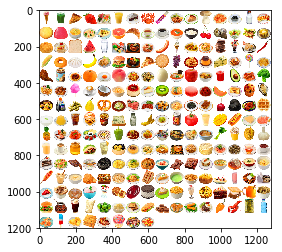

In [6]:
rgba_image = mpimg.imread('food.png')

rgba_pil = PIL.Image.open('food.png')
img = np.array(rgba_pil.convert('RGB'))

row_step = 1200//15
col_step= 1280//16
shelf_coord = [260, 380, 500, 620, 770] #coordinates of the first, second ... shelves


plt.imshow(img)

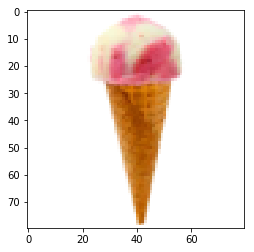

In [7]:
plt.imshow(img[:row_step, :col_step])

(80, 80, 3)


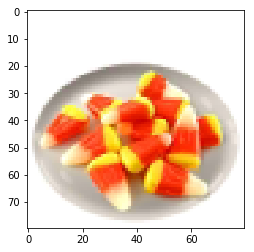

In [8]:
#16 images across, 15 down
images = []
labels = []
for i in range(0, 1200, row_step):
    for j in range(0, 1280, col_step):
        images.append(img[i: i + row_step, j : j + col_step, :])
images = images[:-8]
test_shape = images[-1]
plt.imshow(test_shape)
print(test_shape.shape)

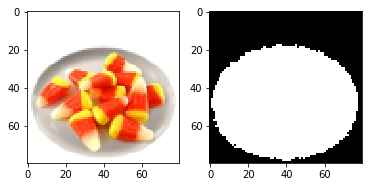

In [9]:
roi_image = propose_regions(test_shape)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(test_shape)
ax[1].imshow(roi_image, 'gray')

In [13]:
fridge = mpimg.imread('fridge.jpg')
fridge = np.array(fridge)



fridge = layer_image(fridge, roi_image, test_shape, shift_down = 670)
print(fridge.shape)
plt.imshow(fridge)

NameError: name 'layer_image' is not defined

In [ ]:
roi_images = [propose_regions(i) for i in images]
#for i in images:
#    roi_images.append(propose_regions(i))


In [ ]:
roi_images = [propose_regions(np.array(images))]

In [ ]:
def fun(num):
    return num**2
a = [1,2,3]
b = [fun(np.array(a))]
print(b)

In [ ]:
def layer_image(background, roi_image, image, shift = (0,0)):
    ''' Replaces the pixels of the foreground with the pixels of the colored image
    wherever the image region is true.
    
    Parameters
    ----------
    background : numpy.array of shape (M,N,3)
    
    roi_image : numpy.array of shape (X,Y,3) where X and Y are <= M and N.
                Elements are 1 where the object region is detected and 0 where it is not.
    
    image : numpy.array of shape (X,Y,3).
            Elements are the color of the image
    
    shift : Tuple(int, int)
                The amount of shift (down, right) from (0,0), or top left, of the background
        
    Returns
    -------
    Numpy.array of shape (M,N,3)
        Altered background array
    '''
    shift_down, shift_right = shift
    for i in range(roi_image.shape[0]):
        for j in range(roi_image.shape[1]):
            if roi_image[i][j] == 1:
                background[i + shift_down][j + shift_right] = image[i][j]
    return background

In [ ]:
def parse_food():


    rgba_pil = PIL.Image.open('fridge/food.png')
    img = np.array(rgba_pil.convert('RGB'))

    row_step = 1200 // 15
    col_step = 1280 // 16

    images = [] #list of each image's rgb arrays
    labels = [] #list of each image's label

    for i in range(0, 1200, row_step):
        for j in range(0, 1280, col_step):
            images.append(img[i: i + row_step, j: j + col_step, :])

    images = np.array(images[:-8]) #takes out the random lack of food at last row
    # list of each regionized image where 1 indicates object and 0 indicates background
    roi_images = np.array([propose_regions(i) for i in images])

    return images, roi_images, labels

In [11]:
def generate_fridge(num_items):

    images, roi_images, labels = parse_food()
    right = [shift for shift in range(30, 400, 80)]
    shelf_coord = [180, 300, 420, 540, 690]  # coordinates of the first, second ... shelves
    shift_ls = []
    for shelf in shelf_coord:
        for pos in right:
            shift_ls.append([(shelf, pos)])
    
    fridge = mpimg.imread('fridge/fridge.jpg')
    fridge = np.array(fridge)

    for i in range(num_items):
        rand_shelf = shelf_coord[np.random.randint(0, len(shelf_coord))]
        rand_image = images[np.random.randint(0, len(images))]
        shift = shift_ls.pop(np.random.randint(0, len(shift_ls))) #random right shift
        fridge = layer_image(fridge, roi_images[i], images[i], shift[0])
    plt.imshow(fridge)

In [12]:
generate_fridge(15)

NameError: name 'parse_food' is not defined